In [54]:
%matplotlib notebook
import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-notebook')

In [83]:
passenger_data = pd.read_csv("titanic_data.csv", sep=',', header=0)

#relevant data
refined_pass_data = passenger_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
refined_pass_data[:3]

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250


In [25]:
# gender bias
gender_data = refined_pass_data[["Survived", "Sex"]]
gender_group = gender_data.groupby(["Sex"])
gender_survived = gender_group.Survived.sum()
gender_count = gender_group.Sex.count()
gender_ratio = { "male": gender_survived["male"]/gender_count["male"], 
                 "female": gender_survived["female"]/gender_count["female"] }
gender_ratio

{'female': 0.7420382165605095, 'male': 0.18890814558058924}

In [27]:
# class bias
class_data = refined_pass_data[["Survived", "Pclass"]]
class_group = class_data.groupby(["Pclass"])
class_survived = class_group.Survived.sum()
class_count = class_group.Pclass.count()
class_ratio = dict()
for class_id in [1,2,3]:
    class_ratio[class_id] = class_survived[class_id]/class_count[class_id]
class_ratio

{1: 0.62962962962962965, 2: 0.47282608695652173, 3: 0.24236252545824846}

<IPython.core.display.Javascript object>


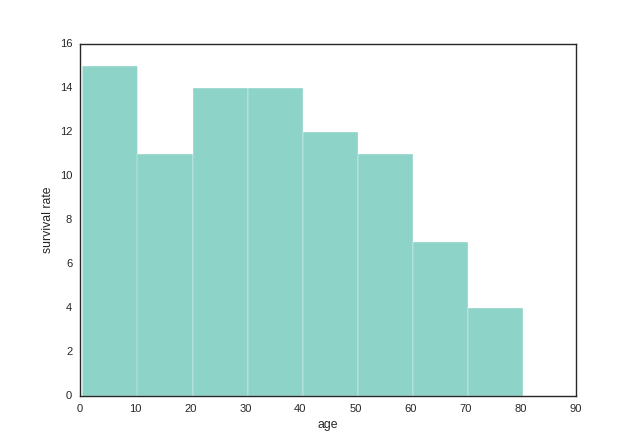

In [56]:
# age bias
age_data = refined_pass_data[["Survived", "Age"]]
age_group = age_data.groupby(["Age"])
age_survived = age_group.Survived.sum()
age_count = age_group.Age.count()
age_ratio = dict()
for age in age_count.keys():
    age_ratio[age] = age_survived[age]/age_count[age]
    

plt.hist(list(age_ratio), bins=np.arange(min(age_ratio), max(age_ratio) + binwidth, binwidth))
plt.xlabel("age")
plt.ylabel("survival rate")
plt.show()
